The goal of this notebook is to calculate the fraction of COSMIC cancer cell lines that are represented in DepMap.

In [2]:
#Set up the environment
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
#Load in the COSMIC cell lines
setwd('/home/jupyter/Ancestry/raw_data/cosmic')
cosmic.lines = read.table('COSMIC_CCLs.csv', sep = ",", header = F) %>% 
pull(1)

In [6]:
#Load in the depmap sample annotation file and filter it so that it only includes the information we want
setwd('/home/jupyter/Ancestry/gwas')
sample.info = read.table('internal-22q1_v24-sample-info.csv', sep = ",", header = T, fill = TRUE) %>%
select(DepMap_ID, RRID)
head(sample.info)

#Load in the ancestry information. This is just so that we can get a list of cell lines that we have SNP6 data for.
#Then pull a vector of just the sample names
setwd('/home/jupyter/Ancestry/rfmix')
snp6.sample.names = read.table("collapsed.ancestry.information.txt", header = T) %>%
pull(sample)

head(snp6.sample.names)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”


,DepMap_ID,RRID
,<chr>,<chr>
1,ACH-000001,CVCL_0465
2,ACH-000002,CVCL_0002
3,ACH-000003,CVCL_0025
4,ACH-000004,CVCL_0001
5,ACH-000005,CVCL_2481
6,ACH-000006,CVCL_1426


[1] "ACH-000657" "ACH-000617" "ACH-000685" "ACH-000632" "ACH-000171"
[6] "ACH-000863"

In [8]:
#Select only the rows in 'sample.info' that are in 'snp6.sample.names'
filtered.sample.info = sample.info %>%
filter(DepMap_ID %in% snp6.sample.names)
head(filtered.sample.info)

,DepMap_ID,RRID
,<chr>,<chr>
1,ACH-000001,CVCL_0465
2,ACH-000002,CVCL_0002
3,ACH-000004,CVCL_0001
4,ACH-000005,CVCL_2481
5,ACH-000007,CVCL_1386
6,ACH-000008,CVCL_1057


In [19]:
#Now calculate the fraction of cosmic.lines which are in depmap
intersecting.lines = intersect(cosmic.lines, filtered.sample.info$RRID)
num.intersecting.lines = intersecting.lines %>% length()

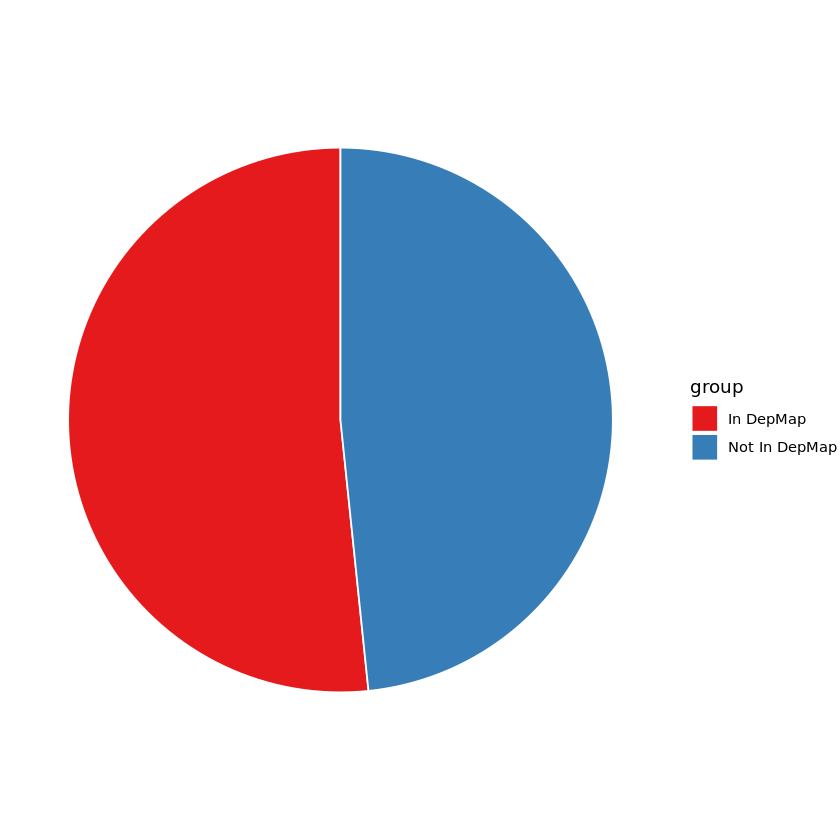

In [40]:
#Assemble the dataset for plotting
group.vector = c("In DepMap", "Not In DepMap")
value.vector = c(num.intersecting.lines, (length(cosmic.lines)-num.intersecting.lines))

df.for.plotting = cbind(group.vector, value.vector) %>%
data.frame() %>%
rename("group" = 1, "value" = 2) %>%
mutate(value = as.numeric(value))

#Make a pie chart
df.for.plotting %>%
ggplot(aes(x="", y=value, fill=group)) +
geom_bar(stat="identity", width=1, color="white") +
coord_polar("y", start=0) +
theme_void() + # remove background, grid, numeric labels
scale_fill_brewer(palette = "Set1")


#Export it to the google bucket
setwd('/home/jupyter/Ancestry/figures')
ggsave("cosmic_pie_chart.pdf", width = 5, height = 5)
system(glue::glue("
cd /home/jupyter/Ancestry/figures
gsutil cp cosmic_pie_chart.pdf gs://fc-45c0e148-0b1c-4244-9bfc-feb559bbc514
"))

In [41]:
df.for.plotting

group,value
<chr>,<dbl>
In DepMap,834
Not In DepMap,781
